# Week 2

In [29]:
import numpy as np
import scipy
import scipy.stats as st
from random import random
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gamma
def likelihood(theta, n, sy):
    return (theta**sy)*np.exp(-n*theta)

## Group A

In [47]:
a = 2
b = 1
prior = st.gamma(a, scale= 1/b)
nA = 111
syA = 217
postA = st.gamma(a+syA, scale=1/(b+nA))
nB = 44
syB = 66
postB = st.gamma(a+syB, scale=1/(b+nB))

aA = 120
bA = 10
priorA = st.gamma(aA, scale= 1/bA)

aB = 12
bB = 1
priorB = st.gamma(aB, scale= 1/bB)

# posterior (mean)
(a+syA)/(b+nA)

1.9553571428571428

In [48]:
#posterior mode
(a+syA-1)/(b+nA)

1.9464285714285714

In [49]:
# posterior 95% CI (Group A)
lbA = gamma.ppf(0.025, a+syA, scale = 1/(b+nA))
ubA = gamma.ppf(0.975, a+syA, scale = 1/(b+nA))
(lbA, ubA)

(1.7049431489418194, 2.2226790202451725)

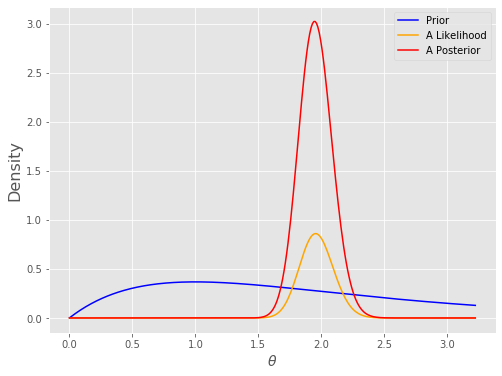

In [50]:
thetas = np.linspace(0.001, ubA+1, 300)
plt.figure(figsize=(8,6))
plt.style.use('ggplot')
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
plt.plot(thetas, (10**31)*likelihood(thetas, nA, syA), label='A Likelihood', c='orange')
plt.plot(thetas, postA.pdf(thetas), label='A Posterior', c='red')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

## Group B

In [51]:
#posterior mean
(a+syB)/(b+nB)

1.511111111111111

In [52]:
#posterior mode
(a+syB-1)/(b+nB)

1.488888888888889

In [53]:
# posterior 95% CI
lbB = gamma.ppf(0.025, a+syB, scale=1/(b+nB))
ubB = gamma.ppf(0.975, a+syB, scale=1/(b+nB))
(lbB, ubB)

(1.1734369056138325, 1.8908362583954745)

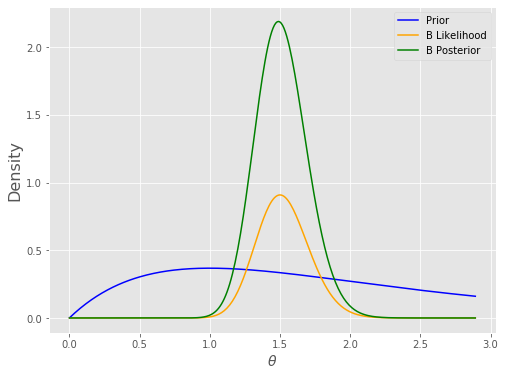

In [54]:
thetas = np.linspace(0.001, ubB+1, 300)
plt.figure(figsize=(8,6))
plt.style.use('ggplot')
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
plt.plot(thetas, (10**17)*likelihood(thetas, nB, syB), label='B Likelihood', c='orange')
plt.plot(thetas, postB.pdf(thetas), label='B Posterior', color='green')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

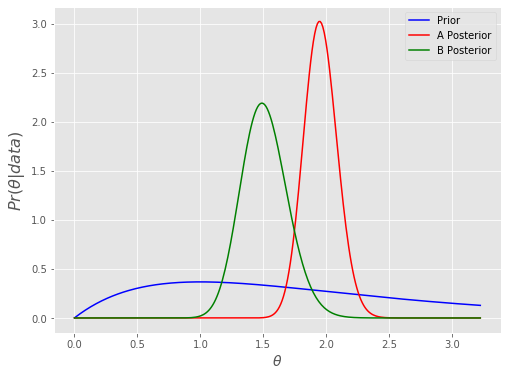

In [55]:
#두 Posterior 비교
thetas = np.linspace(0.001, ubA+1, 300)
plt.figure(figsize=(8,6))
plt.style.use('ggplot')
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
plt.plot(thetas, postA.pdf(thetas), label='A Posterior', c='red')
plt.plot(thetas, postB.pdf(thetas), label='B Posterior', c='green')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'$Pr(\theta|data)$', fontsize=16)
plt.legend();

## Q1. 
Tumor counts: A cancer laboratory is estimating the rate of tumorigenesis in two strains of mice, A and B. They have tumor count data for 10 mice in strain A and 13 mice in strain B. Type A mice have been well studied, and information from other laboratories suggests that type A mice have tumor counts that are approximately Poisson-distributed with a mean of 12. Tumor count rates for type B mice are unknown, but type B mice are related to type A mice. The observed tumor counts for the two populations are

$$y_A = (12, 9, 12, 14, 13, 13, 15, 8, 15, 6)$$$$y_B = (11, 11, 10, 9, 9, 8, 7, 10, 6, 8, 8, 9, 7)$$
(a) Find the posterior distributions, means, variances and 95% quantilebased confidence intervals for $\theta_A$ and $\theta_B$, assuming a Poisson sampling distribution for each group and the following prior distribution:
$$
\theta_{A} \sim \operatorname{gamma}(120,10), \theta_{B} \sim \operatorname{gamma}(12,1), p\left(\theta_{A}, \theta_{B}\right)=p\left(\theta_{A}\right) \times p\left(\theta_{B}\right)
$$

In [56]:
ya = np.array([12, 9, 12, 14, 13, 13, 15, 8, 15, 6])
yb = np.array([11, 11, 10, 9, 9, 8, 7, 10, 6, 8, 8, 9, 7])

num_a = len(ya)
num_b = len(yb)

sum_a = sum(ya)
sum_b = sum(yb)

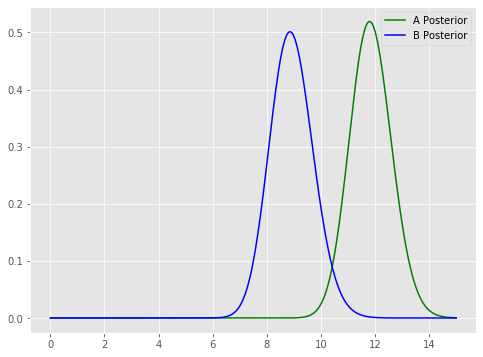

In [57]:
alpha_a = 120
beta_a = 10

#posterior distribution
thetas = np.linspace(0, 15, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, st.gamma(237,scale=1/20).pdf(thetas), label='A Posterior', color='green')
plt.plot(thetas, st.gamma(125,scale=1/14).pdf(thetas), label='B Posterior', color='blue')
plt.legend()

In [58]:
# mean, variance - 95% quantilebased confidence intervals
def get_CI(a,b):
    lb = gamma.ppf(0.025, a, scale=1/b)
    ub = gamma.ppf(0.975, a, scale=1/b)
    return (lb,ub)

print(get_CI(237,20))
print(get_CI(125,14))

(10.389238190941795, 13.405448325642006)
(7.432064219464302, 10.560308149242363)


### (b)Compute and plot the posterior expectation of $\theta_{B}$ under the prior distribution $\theta_{B} \sim \operatorname{gamma}\left(12 \times n_{0}, n_{0}\right)$ for each value of $n_{0} \in\{1,2, \ldots, 50\}$ Describe what sort of prior beliefs about $\theta_{B}$ would be necessary in order for the posterior expectation of $\theta_{B}$ to be close to that of $\theta_{A}$.

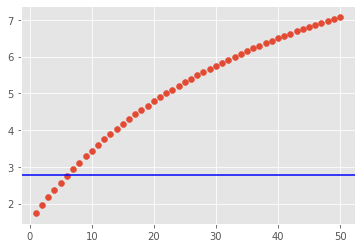

In [59]:
mean = [0]
mean = mean*50
for i in range(50):
    mean[i] = (12*(i+1)+syB)/(i+1+nB)

plt.scatter(range(1,51),mean)
plt.axhline(y=(aA+syA)/(bA+nA), color = 'blue')

## (c) Should knowledge about population A tell us anything about population B? Discuss whether or not it makes sense to have $p(\theta_A, \theta_B) = p(\theta_A) \times p(\theta_B)$

B의 prior 정도가 약함 -> A 와 B는 독립으로 보는 것이 적절하다

# Q2

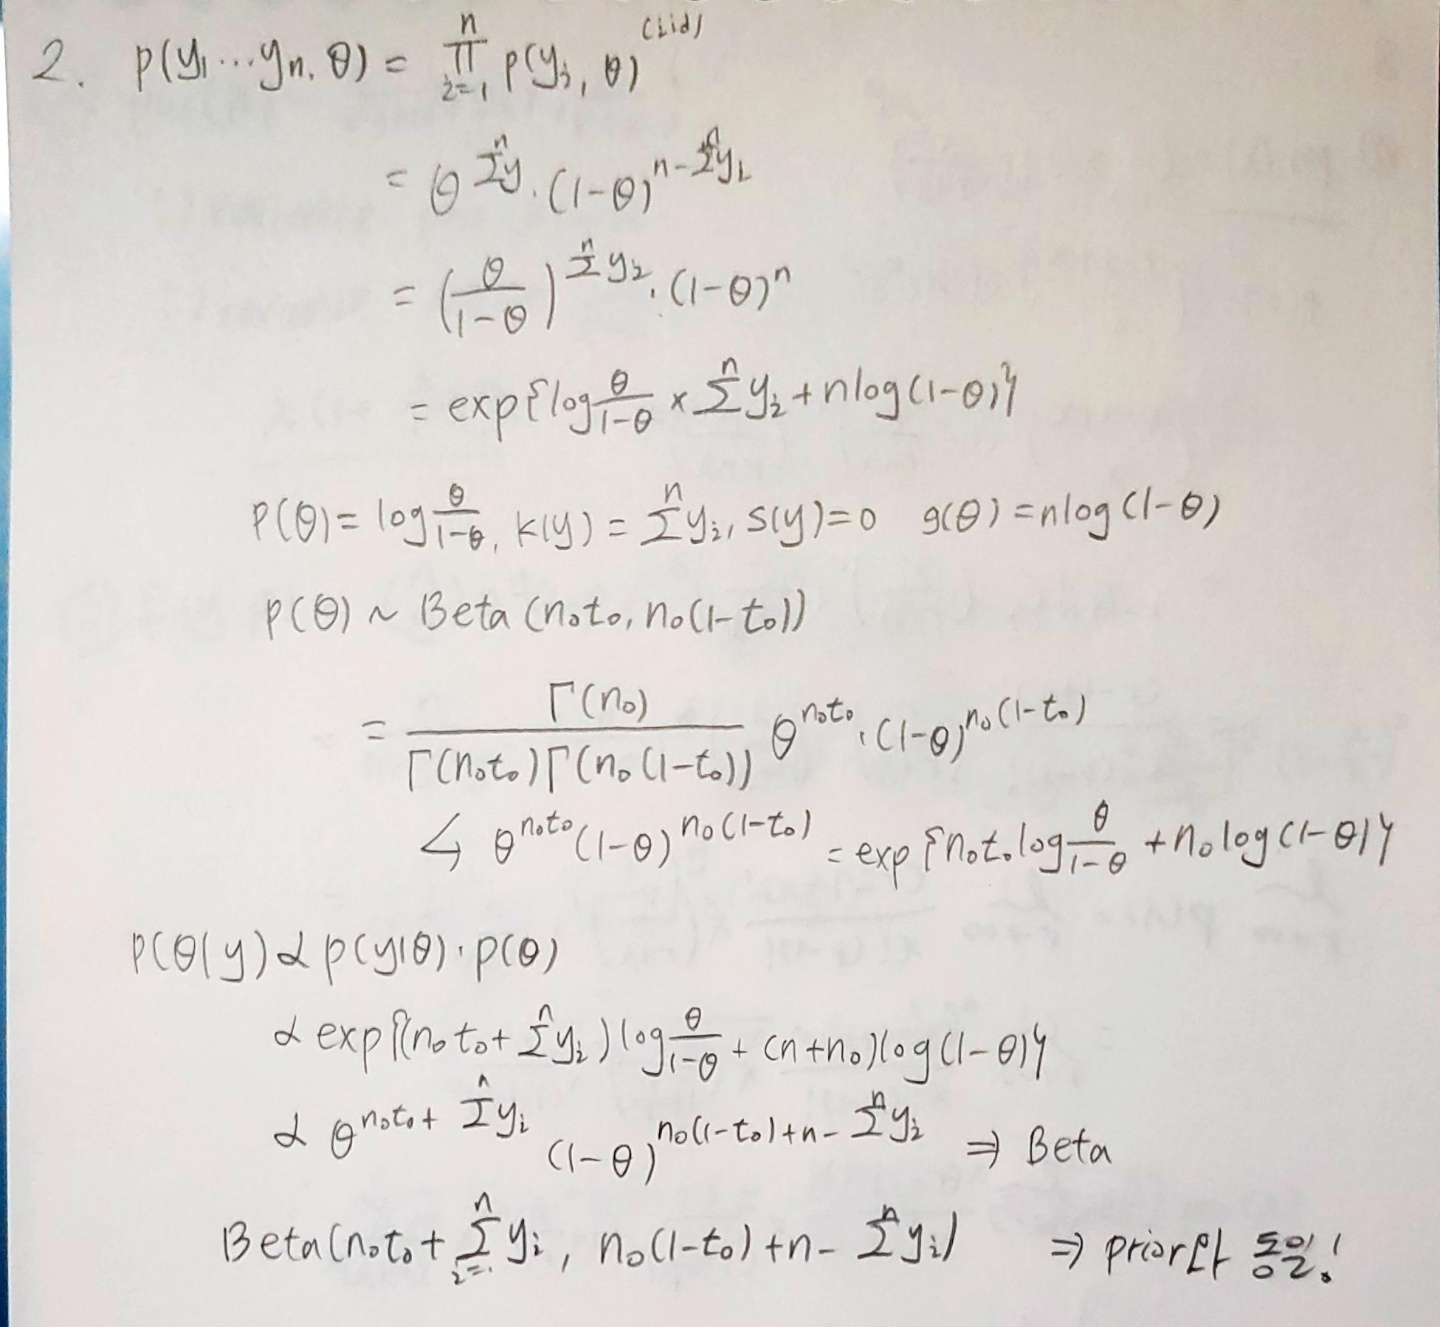

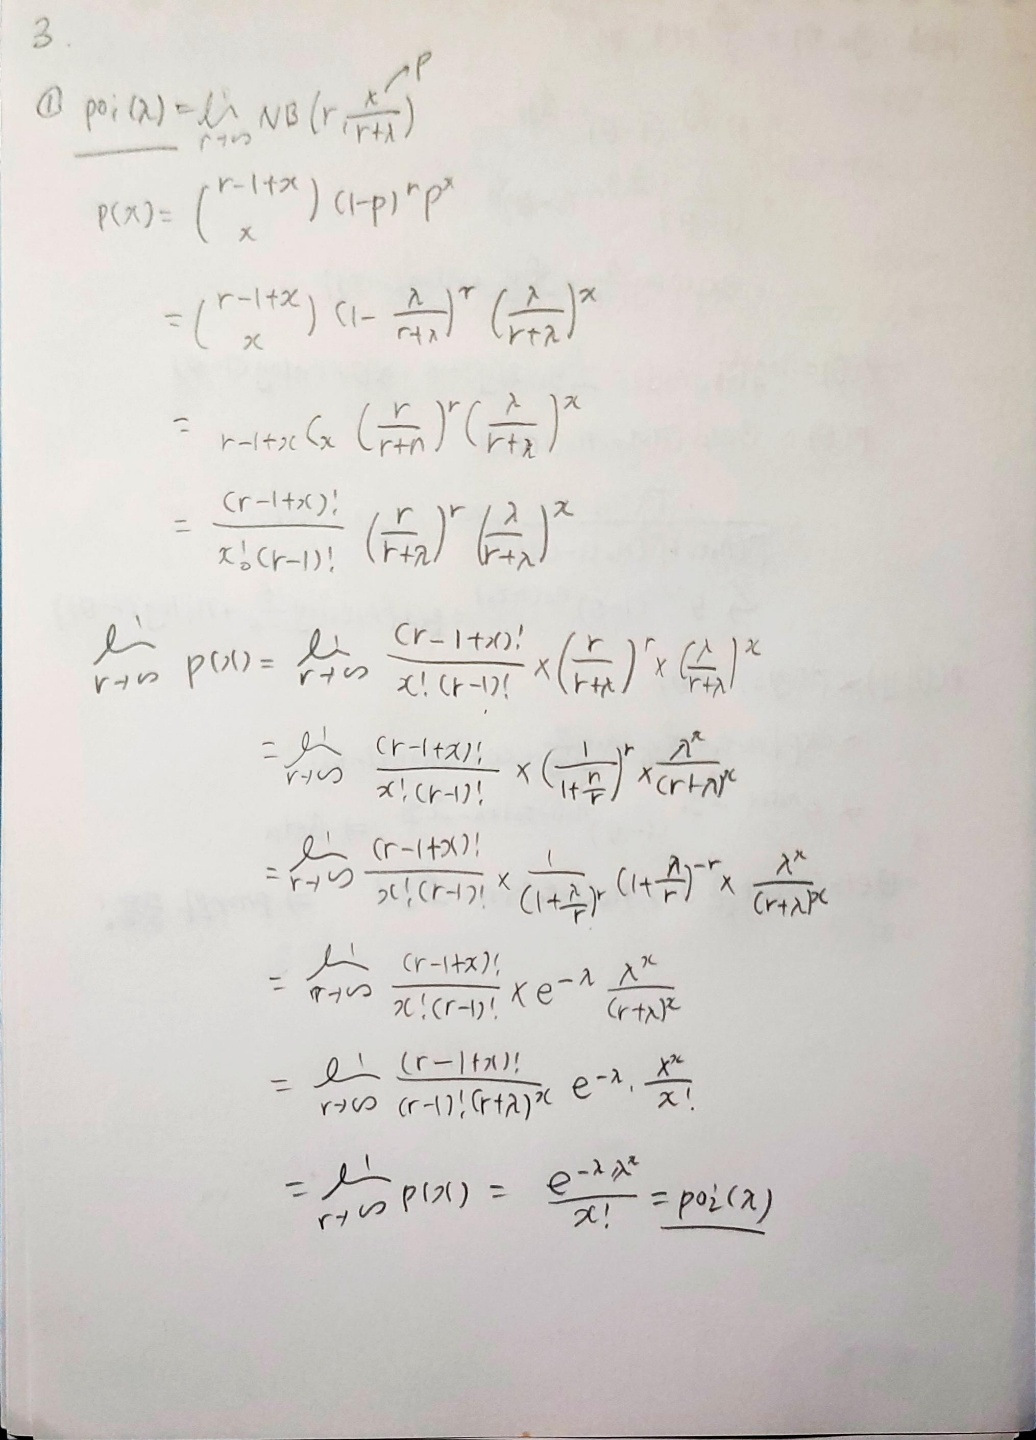

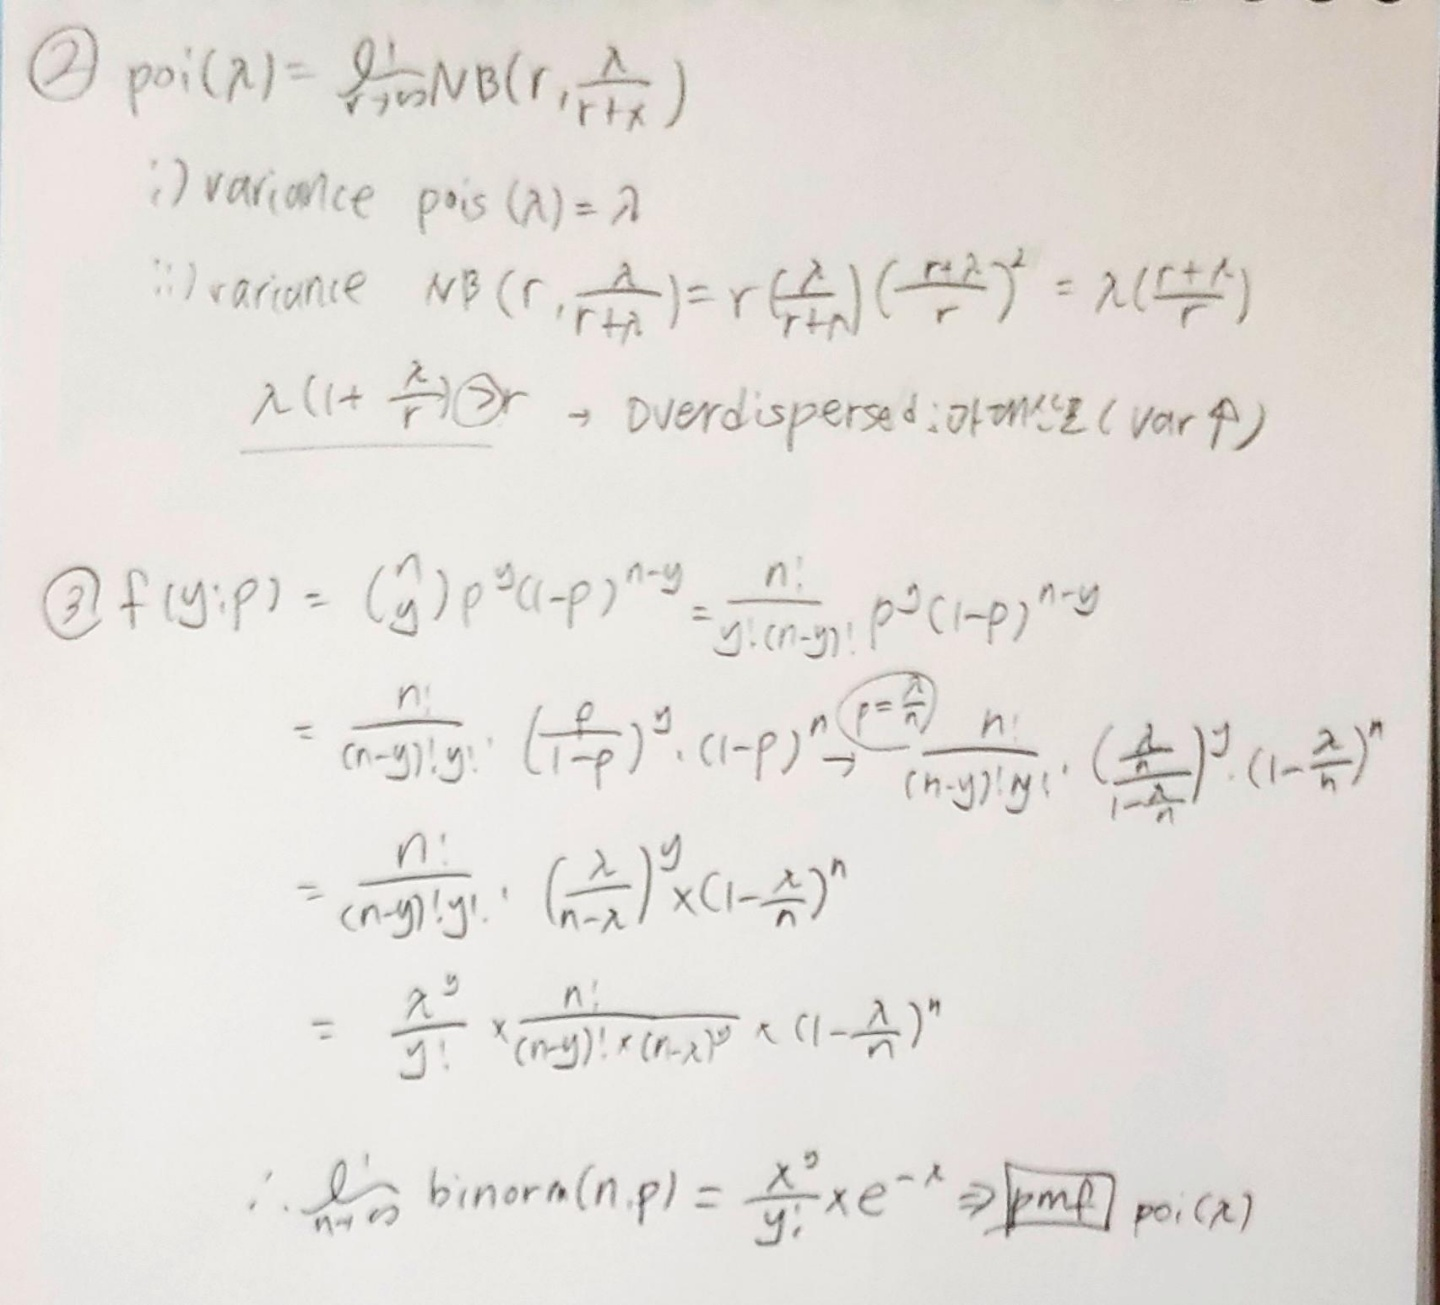